<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-используемых-библиотек" data-toc-modified-id="Импорт-используемых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт используемых библиотек</a></span></li><li><span><a href="#Чтение-файла-с-данными" data-toc-modified-id="Чтение-файла-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла с данными</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Ресемплирование-по-одному-часу" data-toc-modified-id="Ресемплирование-по-одному-часу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ресемплирование по одному часу</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт используемых библиотек

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт библиотеки numpy
import numpy as np

# импорт библиотеки time
import time

# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

# импорт функции декомпозиции из библиотеки statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# импорт функции train_test_split из библиотеки sklearn
from sklearn.model_selection import train_test_split

# импорт средней квадратичной ошибки из библиотеки sklearn
from sklearn.metrics import mean_squared_error

# импорт make_scorer из библиотеки sklearn
from sklearn.metrics import make_scorer

# импорт алгоритма поиска по гиперпараметрам из библиотеки sklearn
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# импорт алгоритма линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

# импорт алгоритма дерева принятия решений из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor

# импорт алгоритма случайного леса из библиотеки sklearn
from sklearn.ensemble import RandomForestRegressor

# импорт градиентного бустинга из библиотеки catboost
from catboost import CatBoostRegressor

# импорт градиентного бустинга из библиотеки lightgbm
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

### Чтение файла с данными

In [2]:
# чтение файла с данными
data = pd.read_csv('/datasets/taxi.csv')

### Изучение общей информации

In [3]:
# получение случайных 10 строк датасета
data.sample(10)

,datetime,num_orders
6691,2018-04-16 11:10:00,11
20830,2018-07-23 15:40:00,15
15820,2018-06-18 20:40:00,11
24122,2018-08-15 12:20:00,22
15966,2018-06-19 21:00:00,9
19089,2018-07-11 13:30:00,25
10535,2018-05-13 03:50:00,29
9038,2018-05-02 18:20:00,6
2363,2018-03-17 09:50:00,10
6080,2018-04-12 05:20:00,0


In [4]:
# получение общей информации о данных датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [5]:
# получение описательной статистики данных датасета
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [6]:
# проверка на наличие дубликатов
data.duplicated().sum()

0

Данные полные, пропусков нет, дубликаты отсутствуют.

### Ресемплирование по одному часу

In [7]:
# чтение файла с данными
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [8]:
# сортировка по индексу
df = df.sort_index(ascending=True)

In [9]:
# проверка на монотонность
df.index.is_monotonic

True

In [10]:
# получение общей информации о данных датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Датасет содержит данные с 1 марта 2018 года по 31 августа 2018 года

Проведем ресемплирование по одному часу и по каждому просуммируем количество заказов.

In [11]:
# ресемплирование по часу
df = df.resample('1H').sum()

In [12]:
# получение первых 10 строк датасета
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


## Анализ

Построим график зависимости количества заказанных такси от времени и отметим на нем скользящее среднее и стационарный ряд.

In [13]:
# создание копии датасета
df_new = df.copy()

In [14]:
# определение скользящего среднего
df_new['rolling_mean'] = df_new.rolling(50).mean()

In [15]:
# определение стационарного ряда
df_new['rolling_std'] = df_new['num_orders'].rolling(50).std()

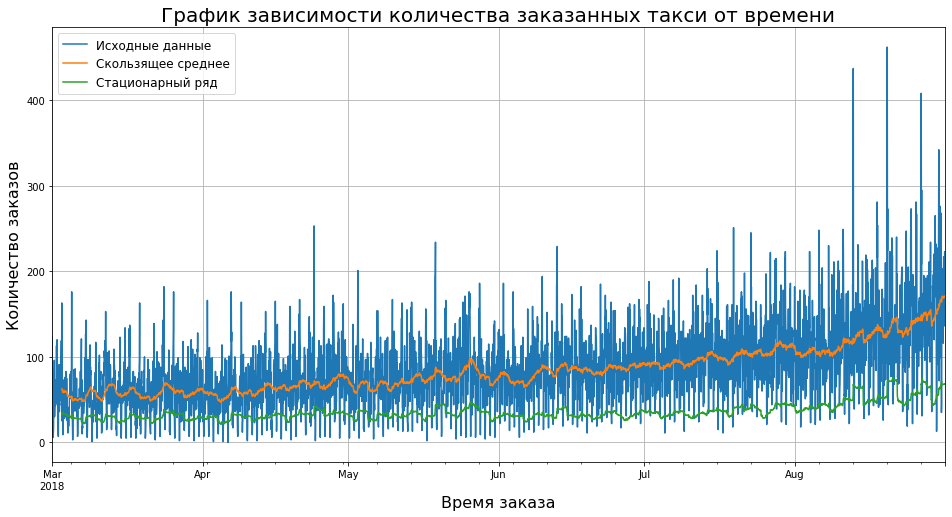

In [16]:
# построение графика
plt.plot
df_new.plot(figsize = (16,8), grid = True)
plt.title('График зависимости количества заказанных такси от времени', fontsize=20)
plt.ylabel('Количество заказов', fontsize=16)
plt.xlabel('Время заказа', fontsize=16)
plt.legend(['Исходные данные', 'Скользящее среднее', 'Стационарный ряд'], fontsize=12)

График показывает, что в более жаркие времена года число заказов в аэропортах увеличивается, что вполне логично, так как сезон отпусков.

Разложим временной ряд на три составляющие: тренд, сезонность и остаток.

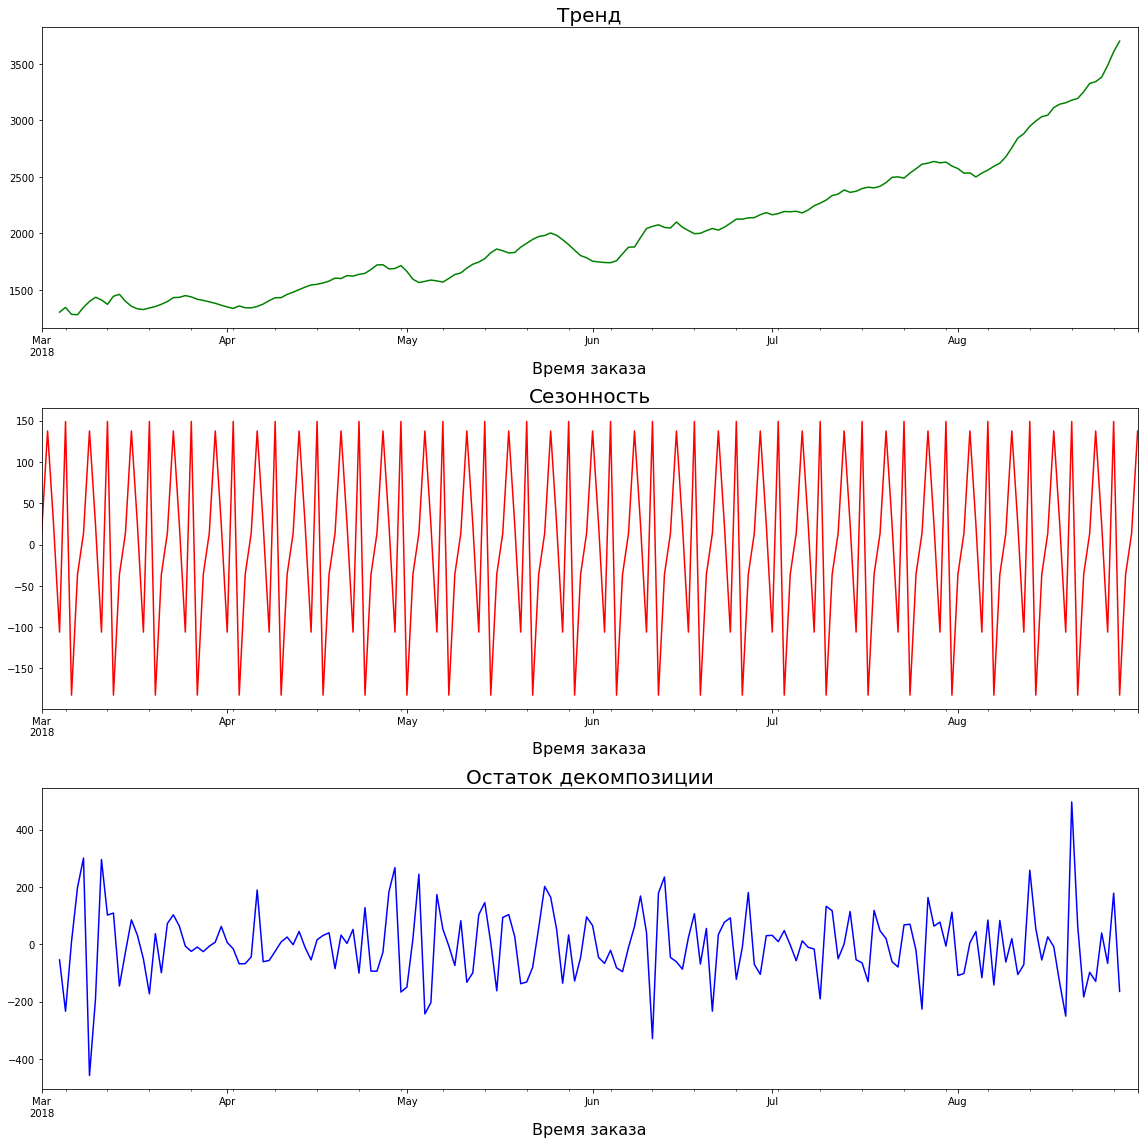

In [17]:
# разложение временного ряда
decomposed = seasonal_decompose(df['num_orders'].resample('1D').sum()) 
# построение графика
plt.figure(figsize=(16, 16))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), color = 'g')
plt.title('Тренд', fontsize=20)
plt.xlabel('Время заказа', fontsize=16)
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), color = 'r')
plt.title('Сезонность', fontsize=20)
plt.xlabel('Время заказа', fontsize=16)
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), color = 'b')
plt.title('Остаток декомпозиции', fontsize=20)
plt.xlabel('Время заказа', fontsize=16)
plt.tight_layout()

Тренд подтверждает, что в теплое время года количество заказов растет. Сезонность демонстрирует закономерность с периодичностью равной примерно 1/4 месяца. Остаток декомпозиции примерно равномерный.

Рассмотрим данные о заказах такси за пару случайных дней.

In [18]:
# ресемплирование по часу
df_new = df['2018-05-24':'2018-05-25'].resample('1H').sum()

Text(0.5, 0, 'Время заказа')

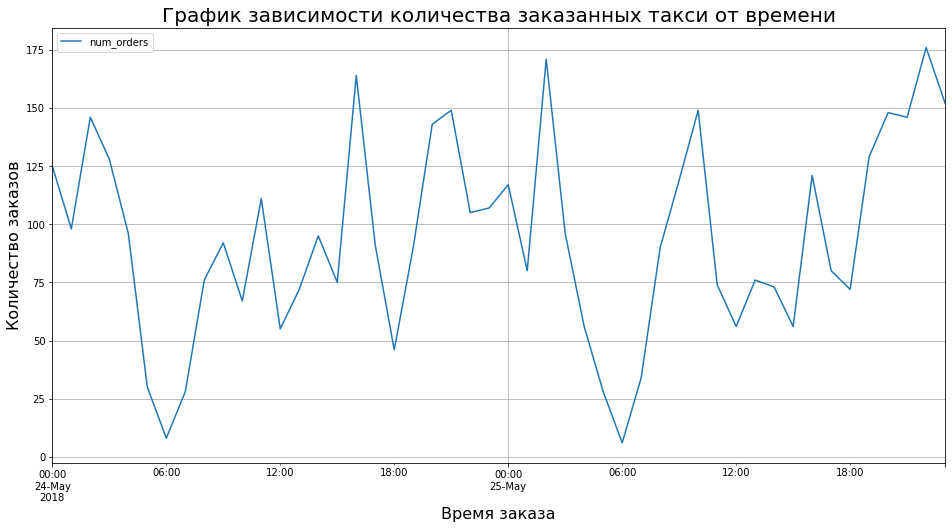

In [19]:
# построение графика
plt.plot
df_new.plot(figsize = (16,8), grid = True)
plt.title('График зависимости количества заказанных такси от времени', fontsize=20)
plt.ylabel('Количество заказов', fontsize=16)
plt.xlabel('Время заказа', fontsize=16)

Меньше всего заказов в 6 утра, а в обед и ночью заказов много. Видно что пик заказов приходится на вторую половину дня, особенно ближе к полуночи.

Рассмотрим сезонность за месяц.

Text(0.5, 0, 'Время заказа')

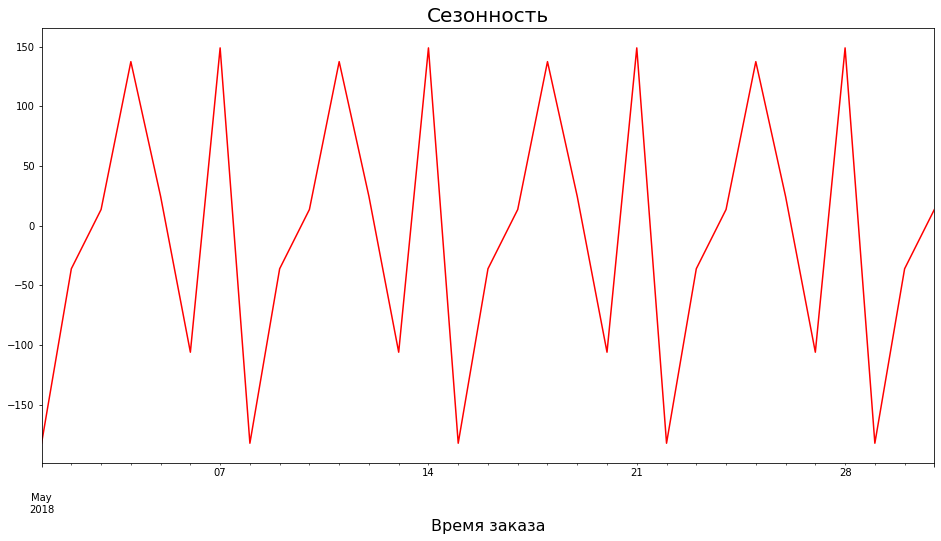

In [20]:
decomposed.seasonal['2018-05-01':'2018-05-31'].plot(ax=plt.gca(), color = 'r', figsize = (16,8))
plt.title('Сезонность', fontsize=20)
plt.xlabel('Время заказа', fontsize=16)

Согласно календарю за 2018 год, пики приходятся на пятницу и понедельники. Вероятно многие улетают/прилетают перед выходными и по понедельникам. Насколько мне известно, по понедельникам цены на билеты чуть ниже. Меньше всего заказов по вторникам и воскременьям.

Подобная зависимость характерна для всего временного промежутка в датасете. Похоже, что это стохастический стационарный процесс.

## Обучение

### Подготовка признаков

In [21]:
# создание признаков
def make_features(df, max_lag, rolling_mean_size):
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

In [22]:
make_features(df, 20, 24)
print(df.head())

                     num_orders  dayofweek  hour  lag_1  lag_2  lag_3  lag_4  \
datetime                                                                       
2018-03-01 00:00:00         124          3     0    NaN    NaN    NaN    NaN   
2018-03-01 01:00:00          85          3     1  124.0    NaN    NaN    NaN   
2018-03-01 02:00:00          71          3     2   85.0  124.0    NaN    NaN   
2018-03-01 03:00:00          66          3     3   71.0   85.0  124.0    NaN   
2018-03-01 04:00:00          43          3     4   66.0   71.0   85.0  124.0   

                     lag_5  lag_6  lag_7  ...  lag_12  lag_13  lag_14  lag_15  \
datetime                                  ...                                   
2018-03-01 00:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 01:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 02:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 03:00:00    NaN    NaN 

In [23]:
# разделение данных
total, test = train_test_split(df, shuffle=False, test_size=0.1)
train, valid = train_test_split(total, shuffle=False, test_size=0.25)

In [24]:
# минимальные и максимальные значения индексов выборок
print(train.index.min(), train.index.max())
print(valid.index.min(), valid.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-07-03 03:00:00
2018-07-03 04:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


In [25]:
# удаление пропусков
train = train.dropna() 

In [26]:
# проверка размеров выборок
print(train.shape)
print(valid.shape)
print(test.shape)

(2956, 24)
(994, 24)
(442, 24)


In [27]:
# создание переменные для признаков и целевого признака
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_valid = valid.drop(['num_orders'], axis=1)
target_valid = valid['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [28]:
# функция для расчета RMSE
def RMSE(target,predictions):
    MSE = mean_squared_error(target, predictions)
    return MSE ** 0.5
RMSE_score = make_scorer(RMSE, greater_is_better=False)

### LinearRegression

In [29]:
%time
model_lr = LinearRegression()
tscv = TimeSeriesSplit(n_splits=8)
lr_params = {
    'copy_X': [False, True],
    'fit_intercept': [True, False],
    'normalize': [True, False]}
grid_lr = GridSearchCV(model_lr, param_grid = lr_params, cv=tscv,
                                            scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_lr.fit(features_train,target_train)
predictions_lr = grid_lr.predict(features_valid)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Fitting 8 folds for each of 8 candidates, totalling 64 fits


In [30]:
print('Качество модели на валидационной выборке', RMSE(target_valid, predictions_lr))

Качество модели на валидационной выборке 33.38814585966799


### RandomForest

In [31]:
%%time
model_rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators':range(10, 31, 10),
             'max_depth':range (1,10)}
grid_rf = GridSearchCV(model_rf, param_grid = rf_params, cv=tscv,
                                            scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_rf.fit(features_train,target_train)
predictions_rf = grid_rf.predict(features_valid)

Fitting 8 folds for each of 27 candidates, totalling 216 fits
CPU times: user 31.6 s, sys: 237 ms, total: 31.9 s
Wall time: 31.9 s


In [32]:
print('Качество модели на валидационной выборке', RMSE(target_valid, predictions_rf))

Качество модели на валидационной выборке 32.20407816196409


### DecisionTree

In [33]:
%%time
model_dt = DecisionTreeRegressor(random_state=42)
dt_params = {'max_depth':range (1,10)}
grid_dt = GridSearchCV(model_dt, param_grid = dt_params, cv=tscv,
                                            scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_dt.fit(features_train,target_train)
predictions_dt = grid_dt.predict(features_valid)

Fitting 8 folds for each of 9 candidates, totalling 72 fits
CPU times: user 1.02 s, sys: 12 µs, total: 1.02 s
Wall time: 1.03 s


In [34]:
print('Качество модели на валидационной выборке', RMSE(target_valid, predictions_dt))

Качество модели на валидационной выборке 39.208359526896444


### CatBoost

In [35]:
%%time
model_cb = CatBoostRegressor(random_state=42,silent=True)
cb_params = {
    'learning_rate': [0.1],
    'iterations': [10,50],
    'max_depth': [10,15]
}
grid_cb = GridSearchCV(model_cb, param_grid = cb_params, cv=tscv,
                                            scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_cb.fit(features_train,target_train)
predictions_cb = grid_cb.predict(features_valid)

Fitting 8 folds for each of 4 candidates, totalling 32 fits
CPU times: user 11min 59s, sys: 6min 59s, total: 18min 58s
Wall time: 19min 10s


In [36]:
print('Качество модели на валидационной выборке', RMSE(target_valid, predictions_cb))

Качество модели на валидационной выборке 33.832665272896115


### LGBM

In [37]:
%%time
model_lgbm = LGBMRegressor(random_state=42)
lgbm_params = {
    'n_estimators': [10,40],
    'max_depth': [15,25],
    'learning_rate': [0.1]
}
grid_lgbm = GridSearchCV(model_lgbm, param_grid = lgbm_params, cv=tscv,
                                            scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_lgbm.fit(features_train,target_train)
predictions_lgbm = grid_lgbm.predict(features_valid)

Fitting 8 folds for each of 4 candidates, totalling 32 fits
CPU times: user 15min 4s, sys: 15.8 s, total: 15min 19s
Wall time: 15min 24s


In [38]:
print('Качество модели на валидационной выборке', RMSE(target_valid, predictions_lgbm))

Качество модели на валидационной выборке 30.98562704820783


## Тестирование

In [39]:
# тестирование LinearRegression
predictions_lr_test = grid_lr.predict(features_test)
rmse_lr = RMSE(target_test, predictions_lr_test)
print('RMSE:','{:.3f}'.format(rmse_lr))

RMSE: 46.476


In [40]:
# тестирование RandomForest
predictions_rf_test = grid_rf.predict(features_test)
rmse_rf = RMSE(target_test, predictions_rf_test)
print('RMSE:','{:.3f}'.format(rmse_rf))

RMSE: 62.242


In [41]:
# тестирование DecisionTree
predictions_dt_test = grid_dt.predict(features_test)
rmse_dt = RMSE(target_test, predictions_dt_test)
print('RMSE:','{:.3f}'.format(rmse_dt))

RMSE: 71.100


In [42]:
# тестирование LGBM
predictions_lgbm_test = grid_lgbm.predict(features_test)
rmse_lgbm = RMSE(target_test, predictions_lgbm_test)
print('RMSE:','{:.3f}'.format(rmse_lgbm))

RMSE: 60.234


In [43]:
# тестирование CatBoost
predictions_cb_test = grid_cb.predict(features_test)
rmse_cb = RMSE(target_test, predictions_cb_test)
print('RMSE:','{:.3f}'.format(rmse_cb))

RMSE: 69.244


## Выводы

In [44]:
models = pd.DataFrame([rmse_lr, rmse_rf, rmse_dt, rmse_lgbm, rmse_cb], 
             columns=['RMSE'], 
                      index=['LinearRegression', 'RandomForest', 'DecisionTrees', 'LGBM', 'CatBoost'])
models

,RMSE
LinearRegression,46.475572
RandomForest,62.241852
DecisionTrees,71.100139
LGBM,60.234302
CatBoost,69.243527


Как видно из таблицы, наилучшей моделью по качеству является линейная регрессия. Значение 46,48 удовлетворяет условиям поставленной задачи.

Можно было улучшить качество путем увеличения количества отстающих значений. Но для скорости расчета достаточно и этих значений.

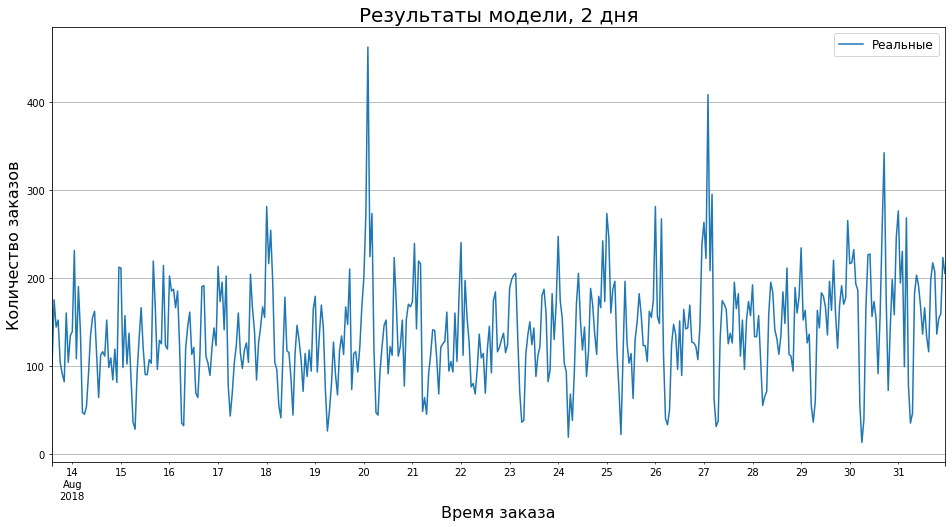

In [112]:
# построение графика
plt.subplot
target_test.plot(figsize = (16,8), grid = True)
pred.plot
plt.title('Результаты модели, 2 дня', fontsize=20)
plt.ylabel('Количество заказов', fontsize=16)
plt.xlabel('Время заказа', fontsize=16)
plt.legend(['Реальные', 'Предсказанные'], fontsize=12)